ANALISIS SENTIMEN PANDANGAN PUBLIK TERHADAP PRESIDEN AMERIKA (TRUMP) MENGGUNAKNA VADER

Import library yang akan digunakan

In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammadhabsyimubarak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
normalization_dict = {
    'gak': 'not',
    'ga': 'not',
    'g': 'not',
    'yuk': 'let us',
    'y': 'yes',
    'iya': 'yes',
    'jgn': 'do not',
    'jangan': 'do not',
    'bgt': 'very',
    'banget': 'very',
    'sdh': 'already',
    'sudh': 'already',
    'udh': 'already',
    'blm': 'not yet',
    'blum': 'not yet',
    'skrng': 'now',
    'skarang': 'now',
    'org': 'people',
    'bgs': 'good',
    'bgus': 'good',
    'mna': 'where',
    'msh': 'still',
    'msih': 'still',
    'sma': 'with',
    'sm': 'with',
    'knp': 'why',
    'kn': 'you',
    'aku': 'i',
    'gw': 'i',
    'sy': 'i',
    'km': 'you',
    'kmu': 'you',
    'kmrn': 'yesterday',
    'kmarin': 'yesterday',
    'ntar': 'later',
    'nt': 'later',
    'tdk': 'not',
    'td': 'ago',
    'brp': 'how many',
    'sbnrny': 'actually',
    'sbnrnya': 'actually',
    'smgt': 'greeting',
    'smgat': 'greeting',
    'mkin': 'more',
    'slm': 'greeting',
    'slmat': 'congratulations',
    'slmt': 'congratulations',
    'mksh': 'thank you',
    'mksih': 'thank you',
    'mkasih': 'thank you',
    'mkasi': 'thank you',
    'plg': 'return',
    'mlm': 'night',
    'mlam': 'night',
    'pgi': 'morning',
    'sg': 'afternoon',
    'bgitu': 'like that',
    'bgt': 'so',
    'bner': 'true',
    'bnr': 'true',
    'bnran': 'really',
    'bnrnya': 'actually',
    'emg': 'indeed',
    'kyk': 'like',
    'kyak': 'like',
    'kya': 'like',
    'klo': 'if',
    'klau': 'if',
    'kalo': 'if',
    'kl': 'if',
    'krn': 'because',
    'karna': 'because',
    'krna': 'because',
    'utk': 'for',
    'untk': 'for',
    'dgn': 'with',
    'dg': 'with',
    'dr': 'from',
    'dri': 'from',
    'dmn': 'where',
    'dmna': 'where',
    'kpd': 'to',
    'kpada': 'to',
    'aj': 'only',
    'aja': 'only',
    'jg': 'also',
    'jga': 'also',
    'jua': 'also',
    'u': 'you',
    'ur': 'your',
    'urs': 'yours',
    'urself': 'yourself',
    'w': 'with',
    'wo': 'without',
    'n': 'and',
    'nd': 'and',
    'plz': 'please',
    'pls': 'please',
    'thx': 'thanks',
    'thanx': 'thanks',
    'tx': 'thanks',
    'lol': 'laugh out loud',
    'lmao': 'laughing my ass off',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'btw': 'by the way',
    'brb': 'be right back',
    'gtg': 'got to go',
    'idk': 'i do not know',
    'ikr': 'i know, right',
    'omw': 'on my way',
    'ttyl': 'talk to you later',
    'wyd': 'what are you doing',
    'wywh': 'wish you were here',
    'bff': 'best friend forever',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'tb': 'thunderbolt', 
    'tbh': 'to be honest',
    'afaik': 'as far as i know',
    'fyi': 'for your information',
    'gtfo': 'get the fuck out',
    'wtf': 'what the fuck',
    'wth': 'what the hell',
    'smh': 'shaking my head',
    'rofl': 'rolling on the floor laughing',
    'gg': 'good game',
    'afk': 'away from keyboard',
    'irl': 'in real life',
    'imo': 'in my opinion',
    'ily': 'i love you',
    'ilysm': 'i love you so much',
    'hbu': 'how about you',
    'wyd': 'what are you doing',
    'wywh': 'wish you were here',
    'irl': 'in real life',
    'smh': 'shaking my head',
    'tbh': 'to be honest',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'btw': 'by the way',
    'brb': 'be right back',
    'gtg': 'got to go',
    'idk': 'i do not know',
    'ikr': 'i know, right',
    'omw': 'on my way',
    'ttyl': 'talk to you later',
    'bff': 'best friend forever',
    'gf': 'girlfriend',
    'bf': 'boyfriend',
    'tb': 'thunderbolt', 
    'afaik': 'as far as i know',
    'gtfo': 'get the fuck out',
    'wtf': 'what the fuck',
    'wth': 'what the hell',
    'rofl': 'rolling on the floor laughing',
    'gg': 'good game',
    'afk': 'away from keyboard',
}

def normalize_slang_gaul(text):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

### Membaca data csv menggunakan library pandas 

In [13]:
# Membaca data
data_path = './tweets-data/trump.csv'
df = pd.read_csv(data_path)

#### Lihat baris data teratas sebanyak 5 baris menggunakan df.head()

In [14]:
# Cek kolom yang tersedia
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1976075103176884627,Wed Oct 08 23:59:52 +0000 2025,32,WATCH: Gov. JB Pritzker claims President Trump always chickens out after he called for his arrest. We've done nothing wrong here. And very importantly it's Donald Trump that is breaching the Constitution breaking the law. We're taking him to court. https://t.co/C7jXkNkvW3,1976075103176884627,https://pbs.twimg.com/amplify_video_thumb/1975979795277115392/img/3vRPpvvpiWlkRJqH.jpg,NaN,en,NaN,2,16,3,https://x.com/undefined/status/1976075103176884627,1441965051414339586,NaN
1,1976075098697462114,Wed Oct 08 23:59:51 +0000 2025,66,Trump raised the Bar and the rest ... https://t.co/K1tESzo5fg,1976075098697462114,https://pbs.twimg.com/media/G2xt1JiXYAACbSO.jpg,NaN,en,NaN,1,11,17,https://x.com/undefined/status/1976075098697462114,1646706148257529865,NaN
2,1976075095753077041,Wed Oct 08 23:59:51 +0000 2025,202,Sen FETTERMAN votes NO on the War Powers Resolution that would require Congressional approval before the Trump admin conducted additional military strikes in the Caribbean.,1976075095753077041,NaN,NaN,en,NaN,25,41,78,https://x.com/undefined/status/1976075095753077041,14007532,NaN
3,1976075075746250859,Wed Oct 08 23:59:46 +0000 2025,88,President Trump Beats Democrats AGAIN - Massive Court Victory READ THE FULL ARTICLE BELOW: https://t.co/QfSJPinVX1,1976075075746250859,https://pbs.twimg.com/media/G2xtzoAWcAAEyhL.jpg,NaN,en,NaN,0,3,63,https://x.com/undefined/status/1976075075746250859,1798808895965847552,NaN
4,1976075060717945219,Wed Oct 08 23:59:42 +0000 2025,613,Trump Announces Israel Hamas PEACE PLAN SIGNED Israel To WITHDRAW Troops | Timcast IRL https://t.co/tUSBYgt21k,1976075060717945219,NaN,NaN,en,NaN,1,66,59,https://x.com/undefined/status/1976075060717945219,27000730,NaN


#### Cleaning Teks

Tahap ini bertujuan untuk membersihkan tweet dari elemen-elemen yang tidak relevan agar siap untuk analisis sentimen yang ada didalam fungsi clean_text().

Langkah-langkah pembersihan:

  1. Case folding – Mengubah seluruh teks menjadi huruf kecil (text.lower()), agar kata serupa (misalnya "Trump", "TRUMP", "TrUmP") dianggap sebagai kata yang sama.
  2. Hapus URL – Menghapus tautan web seperti http://... atau www.... menggunakan ekspresi reguler (regex), karena tautan biasanya tidak membawa informasi sentimen langsung.
  3. Hapus mention & hashtag – Menghapus sebutan pengguna (misalnya @username) dan tanda pagar (misalnya #tagar) menggunakan regex. Ini dilakukan karena mention dan hashtag sering kali bersifat netral terhadap sentimen isi tweet itu sendiri.
  4. Hapus angka – Menghapus semua digit numerik (\d+) menggunakan regex, karena angka biasanya tidak relevan untuk menentukan sentimen positif, negatif, atau netral.
  5. Hapus tanda baca – Menghapus simbol tanda baca seperti koma, titik, tanda seru, tanda tanya, kurung, dll., menggunakan string.punctuation, karena .tanda baca umumnya tidak membawa makna sentimen.
  6. Hapus emoji & karakter non-ASCII – Menghapus emoji dan karakter-karakter non-ASCII (karakter yang berada di luar rentang 0-127 dalam tabel ASCII) menggunakan regex [^\\x00-\\x7f], untuk memastikan teks hanya berisi karakter latin standar yang dapat diproses dengan lebih konsisten oleh alat analisis.
  7. Hapus spasi berlebih – Merapikan teks dari spasi ganda atau lebih menjadi satu spasi, serta menghapus spasi di awal dan akhir kalimat menggunakan regex \\s+ dan metode .strip().
  8. Hapus huruf berulang – Mengurangi huruf yang diulang lebih dari dua kali secara berturut-turut (misalnya "gileeee" menjadi "gile") menggunakan regex (.)\\1{2,}, untuk menormalkan variasi penulisan informal.
  9. Normalisasi slang/gaul – Mengganti singkatan, kata gaul, atau bentuk tidak baku (misalnya "gak" -> "tidak", "yuk" -> "ayo") menjadi bentuk baku menggunakan kamus yang telah didefinisikan sebelumnya (normalize_slang_gaul). Ini membantu menyamakan makna dari berbagai cara penulisan kata yang sama.
  10. Hapus kata pendek – Menghapus kata-kata yang terdiri dari 2 huruf atau kurang (karena langkah sebelumnya menetapkan batas len(word) > 2) karena kata-kata ini sering kali adalah kata hubung, partikel, atau noise yang tidak signifikan untuk analisis sentimen.
  11. Hapus spasi berlebih (lagi) – Setelah proses tokenisasi, penghapusan kata, dan penggabungan ulang, langkah ini diulang untuk memastikan teks benar-benar rapi.
  12. Terapkan ke dataset – Fungsi clean_text() diterapkan ke seluruh baris dalam kolom full_text menggunakan df['full_text'].apply(...), menghasilkan kolom baru bernama clean_text.
  13. Tampilkan hasil – Menampilkan beberapa baris pertama dari kolom full_text dan clean_text secara berdampingan untuk memverifikasi bahwa proses pembersihan berjalan sesuai harapan.
     

In [15]:
import string

# perbaikan kata gaul dan slang serta case foldeng ada disini

def clean_text(text: str) -> str:
    """Membersihkan teks dari URL, mention, hashtag, angka, tanda baca, dan emoji."""
    text = text.lower()                                              # Case folding
    text = re.sub(r'http\S+|www\S+', '', text)                       # Hapus URL
    text = re.sub(r'@\w+', '', text)                                 # Hapus mention
    text = re.sub(r'#\w+', '', text)                                 # Hapus hashtag
    text = re.sub(r'\d+', '', text)                                  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation)) # Hapus tanda baca
    text = re.sub(r'[^\x00-\x7f]', '', text)                         # Hapus emoji
    text = re.sub(r'\s+', ' ', text).strip()                         # Hapus spasi berlebih
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)                       # Hapus kata yang diulang lebih dari dua kali
    text = normalize_slang_gaul(text)                                # Normalisasi slang gaul
    words = text.split()
    words = [word for word in words if len(word) > 2]                # Hapus kata dengan panjang kurang dari 3
    text = ' '.join(words)  
    text = re.sub(r'\s+', ' ', text).strip()                         # Hapus Spasi berlebih
    return text

# Terapkan pembersihan teks
df['clean_text'] = df['full_text'].apply(clean_text)

# perbandingan sebelum dan sesudah pembersihan
pd.set_option('display.max_colwidth', None)
df[['full_text', 'clean_text']].head()

,full_text,clean_text
0,WATCH: Gov. JB Pritzker claims President Trump always chickens out after he called for his arrest. We've done nothing wrong here. And very importantly it's Donald Trump that is breaching the Constitution breaking the law. We're taking him to court. https://t.co/C7jXkNkvW3,watch gov pritzker claims president trump always chickens out after called for his arrest weve done nothing wrong here and very importantly its donald trump that breaching the constitution breaking the law were taking him court
1,Trump raised the Bar and the rest ... https://t.co/K1tESzo5fg,trump raised the bar and the rest
2,Sen FETTERMAN votes NO on the War Powers Resolution that would require Congressional approval before the Trump admin conducted additional military strikes in the Caribbean.,sen fetterman votes the war powers resolution that would require congressional approval before the trump admin conducted additional military strikes the caribbean
3,President Trump Beats Democrats AGAIN - Massive Court Victory READ THE FULL ARTICLE BELOW: https://t.co/QfSJPinVX1,president trump beats democrats again massive court victory read the full article below
4,Trump Announces Israel Hamas PEACE PLAN SIGNED Israel To WITHDRAW Troops | Timcast IRL https://t.co/tUSBYgt21k,trump announces israel hamas peace plan signed israel withdraw troops timcast real life


#### Langkah dibawah ini digunakan untuk memeriksa apakah terdapat tweet yang sama (duplikat) pada kolom teks yang sudah dibersihkan.

In [16]:
# Cek duplikasi pada kolom clean_text
df['clean_text'].duplicated().sum()

64

Setelah ditemukan adanya duplikasi data, langkah berikutnya adalah menghapus tweet yang memiliki teks identik.

In [17]:
# Hapus duplikasi
df.drop_duplicates(subset=['clean_text'], inplace=True)
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")

Jumlah data setelah menghapus duplikat: 1936


## Bi-Gram & Tri-Gram

In [23]:
import pandas as pd 
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 

# 1. Gabungkan semua teks yang telah dibersihkan
all_clean_text = ' '.join(df['clean_text'])

# 2. Tokenisasi teks menjadi daftar kata
tokens = word_tokenize(all_clean_text)

# --- Analisis Bi-gram ---
# 3. Hasilkan bi-gram (pasangan kata)
bigrams = list(ngrams(tokens, 2))

# 4. Hitung frekuensi kemunculan bi-gram
bigram_freq = Counter(bigrams)

# 5. Ambil N bi-gram paling umum (misalnya 10 teratas)
top_n = 10
top_bigrams = bigram_freq.most_common(top_n)

# 6. Tampilkan hasil bi-gram dalam format yang lebih rapi dan informatif
print(f"--- Top {top_n} Bi-gram Paling Umum ---")
print(f"{'Rank':<4} {'Bi-gram':<30} {'Frekuensi':<10}")
print("-" * 45)
for i, (bigram, freq) in enumerate(top_bigrams, start=1):
    # Gabungkan kata dalam bi-gram dengan spasi
    bigram_str = ' '.join(bigram)
    print(f"{i:<4} {bigram_str:<30} {freq:<10}")

print("\n") # Jarak tambahan

# --- Analisis Tri-gram ---
# 7. Hasilkan tri-gram (tiga kata berturut-turut)
trigrams = list(ngrams(tokens, 3))

# 8. Hitung frekuensi kemunculan tri-gram
trigram_freq = Counter(trigrams)

# 9. Ambil N tri-gram paling umum
top_trigrams = trigram_freq.most_common(top_n)

# 10. Tampilkan hasil tri-gram dalam format yang lebih rapi dan informatif
print(f"--- Top {top_n} Tri-gram Paling Umum ---")
print(f"{'Rank':<4} {'Tri-gram':<40} {'Frekuensi':<10}")
print("-" * 55)
for i, (trigram, freq) in enumerate(top_trigrams, start=1):
    # Gabungkan kata dalam tri-gram dengan spasi
    trigram_str = ' '.join(trigram)
    print(f"{i:<4} {trigram_str:<40} {freq:<10}")

# Simpan hasil ke DataFrame untuk analisis lebih lanjut
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bi-gram', 'Frekuensi'])
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Tri-gram', 'Frekuensi'])
df_top_bigrams.to_csv('./tweets-data/top_bigrams.csv', index=False)
df_top_trigrams.to_csv('./tweets-data/top_trigrams.csv', index=False)


--- Top 10 Bi-gram Paling Umum ---
Rank Bi-gram                        Frekuensi 
---------------------------------------------
1    president trump                520       
2    peace plan                     247       
3    israel and                     235       
4    donald trump                   233       
5    first phase                    227       
6    and hamas                      222       
7    the first                      221       
8    hamas have                     169       
9    signed off                     119       
10   off the                        109       


--- Top 10 Tri-gram Paling Umum ---
Rank Tri-gram                                 Frekuensi 
-------------------------------------------------------
1    israel and hamas                         219       
2    the first phase                          184       
3    and hamas have                           161       
4    signed off the                           100       
5    off the first     

## WordCloud

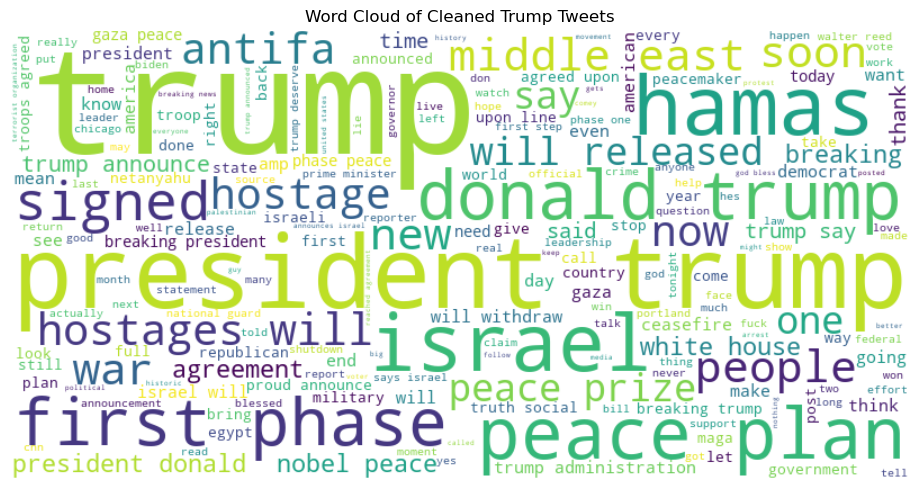

In [ ]:
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_for_wordcloud)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Cleaned Trump Tweets')
plt.tight_layout()
plt.show()

#### Analisis Sentimen Menggunakan VADER

Tahap ini bertujuan untuk mengukur sentimen tiap tweet menggunakan VADER (Valence Aware Dictionary and sEntiment Reasoner), yaitu model leksikon bawaan NLTK yang efektif untuk teks pendek seperti tweet.

In [24]:
# analisis sentimen menggunakan vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Klasifikasi sentimen
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df[['clean_text', 'sentiment', 'sentiment_label']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/muhammadhabsyimubarak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,sentiment,sentiment_label
0,watch gov pritzker claims president trump always chickens out after called for his arrest weve done nothing wrong here and very importantly its donald trump that breaching the constitution breaking the law were taking him court,0.4112,positive
1,trump raised the bar and the rest,0.0000,neutral
2,sen fetterman votes the war powers resolution that would require congressional approval before the trump admin conducted additional military strikes the caribbean,-0.5106,negative
3,president trump beats democrats again massive court victory read the full article below,0.0000,neutral
4,trump announces israel hamas peace plan signed israel withdraw troops timcast real life,0.5423,positive


#### 📊 Visualisasi Hasil Analisis Sentimen

Tahap ini bertujuan untuk memahami sebaran dan distribusi hasil sentimen dari tweet yang telah dianalisis menggunakan VADER.

/var/folders/1h/19sn8dhd4pv7f4lwt4g883p80000gn/T/ipykernel_2813/3673871075.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')


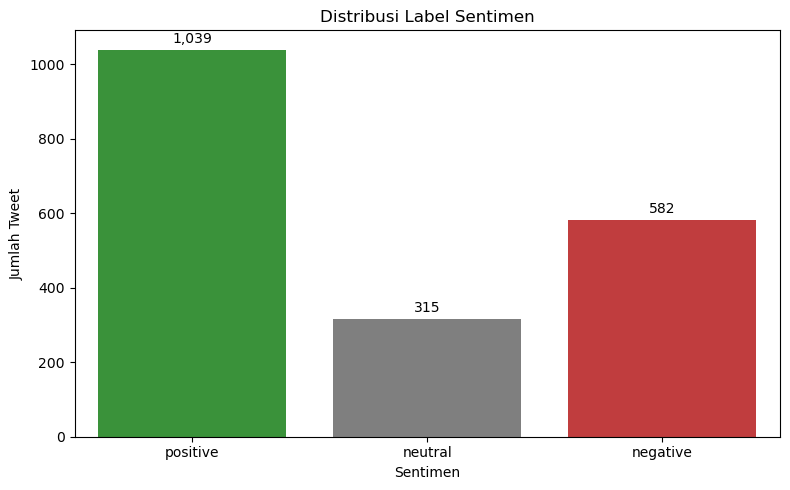

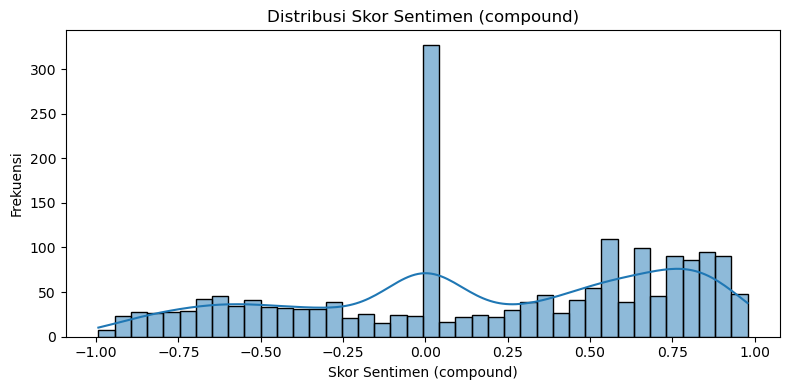

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pastikan kolom tanggal dalam format datetime
df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')

# 1) Distribusi label sentimen (count)
plt.figure(figsize=(8,5))
ax1 = sns.countplot(data=df, x='sentiment_label', order=['positive','neutral','negative'],
          palette={'positive':'#2ca02c','neutral':'#7f7f7f','negative':'#d62728'})
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
# tambahkan anotasi jumlah di atas bar
for p in ax1.patches:
  ax1.annotate(format(int(p.get_height()), ','), 
         (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Histogram/Distribusi skor sentiment (compound)
plt.figure(figsize=(8,4))
sns.histplot(df['sentiment'], bins=40, kde=True, color='#1f77b4')
plt.title('Distribusi Skor Sentimen (compound)')
plt.xlabel('Skor Sentimen (compound)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Penjelasan
Kode berikut digunakan untuk menjalankan proses analisis atau pembersihan data. Pastikan semua dependensi sudah terinstal sebelum menjalankan cell ini.


In [27]:
# 7. Simpan hasil data
selected_columns = ['created_at','full_text','clean_text', 'sentiment', 'sentiment_label']
df[selected_columns].to_csv("./tweets-data/trumpt_clean.csv" , index=False)
print("✅ Preprocessing selesai! File disimpan sebagai trump_clean.csv")

✅ Preprocessing selesai! File disimpan sebagai trump_clean.csv



## 📊 Kesimpulan Analisis Sentimen

Berdasarkan hasil analisis sentimen terhadap tweet yang mengandung kata kunci *Trump*, dapat disimpulkan bahwa:

- Tweet dengan sentimen **positif** menunjukkan opini yang mendukung atau mengapresiasi kebijakan atau tindakan Trump.  
- Tweet dengan sentimen **negatif** mencerminkan kritik, ketidaksetujuan, atau pernyataan yang bernada menyerang.  
- Tweet dengan sentimen **netral** biasanya berupa pernyataan informatif, berita, atau fakta tanpa emosi yang kuat.

Visualisasi distribusi dan skor sentimen menunjukkan kecenderungan umum opini publik terhadap Trump selama periode waktu pengambilan data.
